In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/ML/KNN/height_weight_data.csv'

In [4]:
# Load the data
data = pd.read_csv(file_path)
data.head()
data.head(data.shape[0])

,Height (cm),Weight (KG),Class
0,180,53,Underweight
1,160,73,Overweight
2,168,57,Normal
3,167,54,Underweight
4,183,53,Underweight
...,...,...,...
95,177,77,Overweight
96,190,50,Underweight
97,181,73,Overweight
98,163,71,Overweight


In [16]:
# Extract columns as numpy arrays
height = data['Height (cm)'].values
weight = data['Weight (KG)'].values
class_label = data['Class'].values

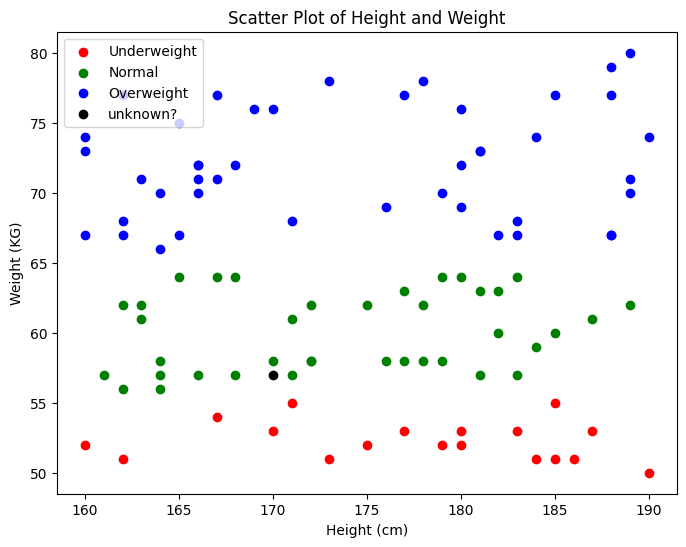

In [17]:
# Scatter plot to visualize the data
plt.figure(figsize=(8, 6))
for label, color in zip(['Underweight', 'Normal', 'Overweight'], ['red', 'green', 'blue']):
    indices = np.where(class_label == label)
    plt.scatter(height[indices], weight[indices], color=color, label=label)
plt.scatter(170, 57, color='black', label='unknown?')  # The given point
plt.xlabel('Height (cm)')
plt.ylabel('Weight (KG)')
plt.title('Scatter Plot of Height and Weight')
plt.legend()
plt.show()

In [40]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2)).round(2)

# Given point
point = np.array([150, 65])  # The point for classification

# Calculate distances from the given point to all points in the dataset
distances = [euclidean_distance(point, np.array([h, w])) for h, w in zip(height, weight)]
distances

[32.31,
 12.81,
 19.7,
 20.25,
 35.11,
 32.02,
 38.05,
 12.37,
 26.93,
 16.4,
 17.89,
 26.31,
 10.2,
 17.46,
 30.81,
 27.07,
 17.03,
 28.86,
 37.0,
 13.45,
 36.4,
 32.06,
 21.19,
 16.64,
 41.0,
 23.32,
 12.37,
 13.6,
 37.22,
 29.83,
 37.7,
 33.02,
 29.55,
 39.12,
 12.17,
 21.95,
 30.27,
 39.85,
 21.21,
 17.46,
 18.44,
 32.02,
 34.53,
 16.97,
 20.81,
 13.34,
 18.03,
 31.95,
 23.26,
 21.38,
 17.09,
 19.31,
 39.46,
 32.7,
 29.43,
 15.13,
 33.96,
 15.03,
 23.09,
 39.32,
 32.06,
 18.03,
 22.83,
 35.17,
 13.6,
 38.63,
 35.36,
 23.09,
 15.0,
 41.79,
 30.87,
 32.39,
 16.76,
 25.18,
 40.5,
 30.02,
 15.65,
 16.12,
 33.06,
 27.89,
 33.14,
 26.42,
 28.16,
 22.47,
 14.04,
 28.18,
 36.77,
 38.9,
 14.87,
 18.03,
 31.06,
 31.78,
 22.2,
 29.02,
 26.93,
 29.55,
 42.72,
 32.02,
 14.32,
 38.05]

In [41]:
# Number of nearest neighbors to consider
K = 5

# Create a DataFrame to organize distances and classes
df_distances = pd.DataFrame({'distance': distances, 'class': class_label})

# Sort by distance and get the K nearest neighbors
nearest_neighbors = df_distances.sort_values(by='distance').head(K)

# Count the occurrences of each class among the nearest neighbors
class_counts = nearest_neighbors['class'].value_counts()

# Identify the class with the maximum count
max_class = class_counts.idxmax()

# Output the results
print(f"The three nearest neighbors are:\n{nearest_neighbors}")
print(f"The majority class among the {K} nearest neighbors is: {max_class}")

The three nearest neighbors are:
    distance       class
12     10.20  Overweight
34     12.17  Overweight
26     12.37      Normal
7      12.37  Overweight
1      12.81  Overweight
The majority class among the 5 nearest neighbors is: Overweight
